In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import json
import apache_log_parser
from pprint import pprint
import os

In [2]:


line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b \"%{Referer}i\" \"%{User-Agent}i\"")
test_data ='xxx.xxx.xxx.xxx - - [18/Feb/2019:23:58:36 +0900] "GET /ja/index.html HTTP/1.1" 301 240 "-" "Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0)"'
log_line_data = line_parser(test_data)
pprint(log_line_data)

{'remote_host': 'xxx.xxx.xxx.xxx',
 'remote_logname': '-',
 'remote_user': '-',
 'request_first_line': 'GET /ja/index.html HTTP/1.1',
 'request_header_referer': '-',
 'request_header_user_agent': 'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT '
                              '6.1; Trident/6.0)',
 'request_header_user_agent__browser__family': 'IE',
 'request_header_user_agent__browser__version_string': '10.0',
 'request_header_user_agent__is_mobile': False,
 'request_header_user_agent__os__family': 'Windows',
 'request_header_user_agent__os__version_string': '7',
 'request_http_ver': '1.1',
 'request_method': 'GET',
 'request_url': '/ja/index.html',
 'request_url_fragment': '',
 'request_url_hostname': None,
 'request_url_netloc': '',
 'request_url_password': None,
 'request_url_path': '/ja/index.html',
 'request_url_port': None,
 'request_url_query': '',
 'request_url_query_dict': {},
 'request_url_query_list': [],
 'request_url_query_simple_dict': {},
 'request_url_scheme': '',
 'requ

In [3]:
#  199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b")
test_data ='199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245'
log_line_data = line_parser(test_data)
pprint(log_line_data)

{'remote_host': '199.72.81.55',
 'remote_logname': '-',
 'remote_user': '-',
 'request_first_line': 'GET /history/apollo/ HTTP/1.0',
 'request_http_ver': '1.0',
 'request_method': 'GET',
 'request_url': '/history/apollo/',
 'request_url_fragment': '',
 'request_url_hostname': None,
 'request_url_netloc': '',
 'request_url_password': None,
 'request_url_path': '/history/apollo/',
 'request_url_port': None,
 'request_url_query': '',
 'request_url_query_dict': {},
 'request_url_query_list': [],
 'request_url_query_simple_dict': {},
 'request_url_scheme': '',
 'request_url_username': None,
 'response_bytes_clf': '6245',
 'status': '200',
 'time_received': '[01/Jul/1995:00:00:01 -0400]',
 'time_received_datetimeobj': datetime.datetime(1995, 7, 1, 0, 0, 1),
 'time_received_isoformat': '1995-07-01T00:00:01',
 'time_received_tz_datetimeobj': datetime.datetime(1995, 7, 1, 0, 0, 1, tzinfo='0400'),
 'time_received_tz_isoformat': '1995-07-01T00:00:01-04:00',
 'time_received_utc_datetimeobj': datet

In [2]:
from typing import List

log_line_data = None
line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b")
with open(f"{os.getcwd()}/NASA_access_log_Jul95.log", mode='r') as f1:
    with open(f"{os.getcwd()}/NASA_access_log_Aug95.log", mode='r') as f2:
        log_line_data = [line_parser(line) for line in f1.readlines() + f2.readlines()]


In [5]:
df_log_line_data = pd.DataFrame([{"date": df_line["time_received_datetimeobj"], "count": 1} for df_line in log_line_data])
df_log_line_data

,date,count
0,1995-07-01 00:00:01,1
1,1995-07-01 00:00:06,1
2,1995-07-01 00:00:09,1
3,1995-07-01 00:00:11,1
4,1995-07-01 00:00:11,1
...,...,...
3461607,1995-08-31 23:59:49,1
3461608,1995-08-31 23:59:49,1
3461609,1995-08-31 23:59:52,1
3461610,1995-08-31 23:59:52,1


In [ ]:
df_S = df_log_line_data.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index()


In [6]:
df_log_line_data_by_min = df_log_line_data.groupby(pd.Grouper(key="date", freq="min")).sum()
df_log_line_data_by_min

,count
date,
1995-07-01 00:00:00,42
1995-07-01 00:01:00,61
1995-07-01 00:02:00,57
1995-07-01 00:03:00,71
1995-07-01 00:04:00,70
...,...
1995-08-31 23:55:00,30
1995-08-31 23:56:00,38
1995-08-31 23:57:00,16


In [38]:
df_log_line_data_by_hourly = df_log_line_data.groupby(pd.Grouper(key="date", freq="H")).sum()
df_log_line_data_by_hourly

,count
date,
1995-07-01 00:00:00,3565
1995-07-01 01:00:00,3004
1995-07-01 02:00:00,2268
1995-07-01 03:00:00,1734
1995-07-01 04:00:00,1482
...,...
1995-08-31 19:00:00,2946
1995-08-31 20:00:00,2737
1995-08-31 21:00:00,2463


<AxesSubplot:xlabel='date'>

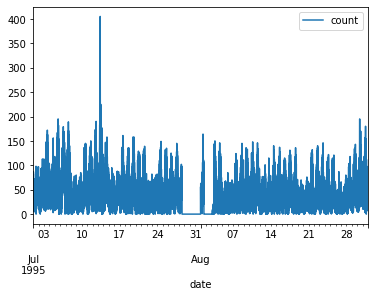

In [7]:
df_log_line_data_by_min.plot()

<AxesSubplot:xlabel='date'>

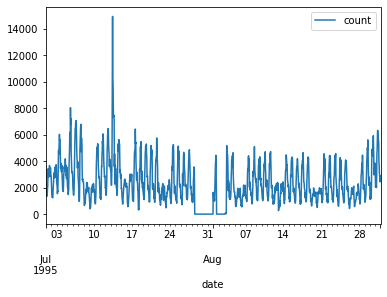

In [49]:
df_log_line_data_by_hourly.plot()

<AxesSubplot:xlabel='date'>

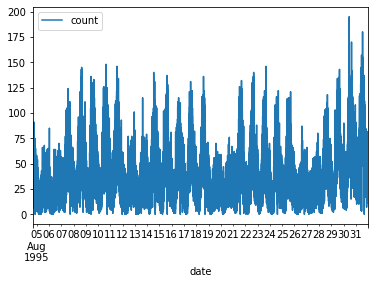

In [8]:
df_log_line_data_by_min_50000 = df_log_line_data_by_min[50000:]
df_log_line_data_by_min_50000.plot()

<AxesSubplot:xlabel='date'>

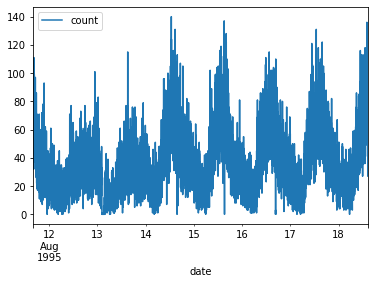

In [10]:
df_log_line_data_by_min_10000 = df_log_line_data_by_min[60000:70000]
df_log_line_data_by_min_10000.plot()

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df_log_line_data_by_min_45000 = df_log_line_data_by_min[45000:]
p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 60 * 24

result = SARIMAX(df_log_line_data_by_min_45000, order=(p,d,q), seasonal_order=(sp, sd, sq, seasonal), enforce_stationarity=False, enforce_invertibility=False).fit()

res = result.resid

plt.bar(range(len(res)), res)